In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
#Import dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.shape

(10, 3)

In [4]:
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
#Matrix of independent features
X = dataset.iloc[:,1:2].values

# Dependent Variable
y = dataset.iloc[:, 2].values

In [6]:
# Feature Scaling

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = y.reshape(-1, 1) # To counter the warning
y = sc_y.fit_transform(y)

/Users/madhupgarg123/Applications/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Fitting Support Vector Regression to the dataset
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/Users/madhupgarg123/Applications/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
#Fitting Support Vector Regression to X dataset

y_pred = regressor.predict(X)

In [9]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print y_pred

[170370.0204065]


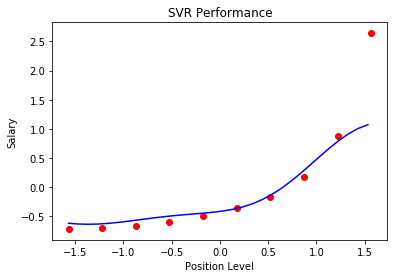

In [15]:
#Visualizing SVR results

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR Performance')
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()